<div class="alert alert-block alert-info">
    <b> Style Sheets and Persistent Customization </b><br>
- In the work we've done so far, we've shown the many ways that one can manipulate a simple matplotlib graph object. <br>
- However, there are many times where you don't really want to repeat yourself with the same 10 lines of code for the same axis manipulations over and over again when writing a script or doing some analysis. <br>
- For these instances, we'll show how to apply graph customizations that flow through the rest of your work. After all, modularity is the name of the game. <br>
- The bulk of the code and concepts in this notebook comes from these two sources: <a href="https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html">Matplotlib's guide on customizations</a> and <a href="https://hfstevance.com/blog/2019/7/22/matplotlib-style">Dr. Heloise Stevance's guide on her personal blog</a>, so credit where credit's due. <br>
    
</div>

# 0. Prepare Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Import Data Step
- Elo is a measure of team strength created by 538. The greater a team's Elo rating, the better (we worked with this dataset in Part 1). <br>
- In the below dataset, the fields we'll care most about are the year_id, fran_id, seasongame (which game of the season is it?), and the elo_i (a team's Elo rating coming into the game).

In [2]:
# Import 538 Elo csv (https://github.com/fivethirtyeight/data/tree/master/nba-elo)
elo = pd.read_csv('sample_data/nbaallelo.csv')
elo.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


# 1. Pre-existing Style Sheets

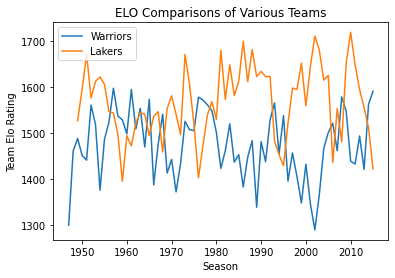

In [3]:
# Let's build one of the simple ELO plots from Part 1 with all the basic stylings
# For ease of use later, I'm going to write this as a basic function
elo_in = elo[elo["seasongame"] == 1]

def basic_graph():
    plt.figure()

    for i in ['Warriors', 'Lakers']:
        plt.plot(elo_in[elo_in['fran_id'] == i]['year_id'], elo_in[elo_in['fran_id'] == i]['elo_i'], label=i)

    plt.xlabel('Season')
    plt.ylabel('Team Elo Rating')
    plt.title('ELO Comparisons of Various Teams')
    plt.legend()
    plt.show()
    
basic_graph()

### Matplotlib has some basic default style sheets already built in that you can use to quickly change the appearance of your graph. Let's quickly explore them.
Here's the reference page: https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html

In [4]:
# Let's check what styles are available to us
for i in plt.style.available:
    print (i)

Solarize_Light2
_classic_test_patch
bmh
classic
dark_background
fast
fivethirtyeight
ggplot
grayscale
seaborn
seaborn-bright
seaborn-colorblind
seaborn-dark
seaborn-dark-palette
seaborn-darkgrid
seaborn-deep
seaborn-muted
seaborn-notebook
seaborn-paper
seaborn-pastel
seaborn-poster
seaborn-talk
seaborn-ticks
seaborn-white
seaborn-whitegrid
tableau-colorblind10


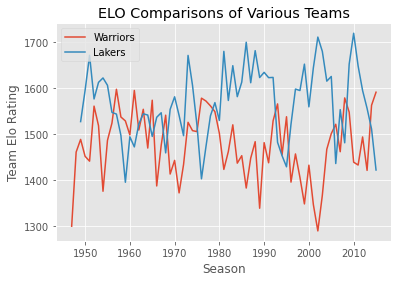

In [5]:
# Now we can apply a couple of these style sheets to see what they can do
plt.style.use('ggplot')
basic_graph()

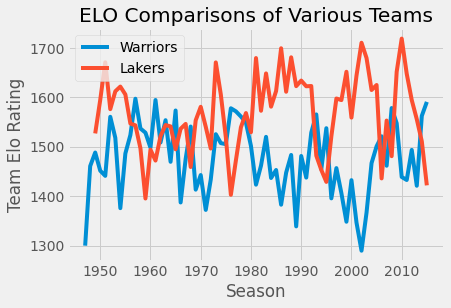

In [6]:
# We can also just temporarily call a style sheet 
# This can come in handy if you'd rather just focus on a specific block of code without overwriting the global settings for the notebook
# You'll notice that if you try to run another graph after this cell, it will go back to using the 'ggplot' styling from the prior cell
with plt.style.context('fivethirtyeight'):
    basic_graph()

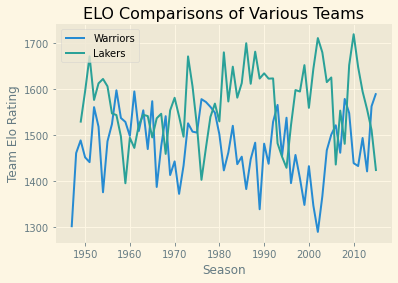

In [7]:
plt.style.use('Solarize_Light2')
basic_graph()

# 2. rcParams

- So we understand that there are some basic options available to us, but obviously everyone is going to have their own tastes, and moreover, some of those above choices are outright bad! 
- But before we get to global customization and creating our own style sheets, we can also persist a few key design choices just by configuring what is known as 'rc parameters.' 
- Matplotlib has a default rcParams script that is loaded upon startup, but I prefer not to mess with that. Instead, we're gonna show some quick design abilities by modifying the rcParams configurations inside our notebook or script.

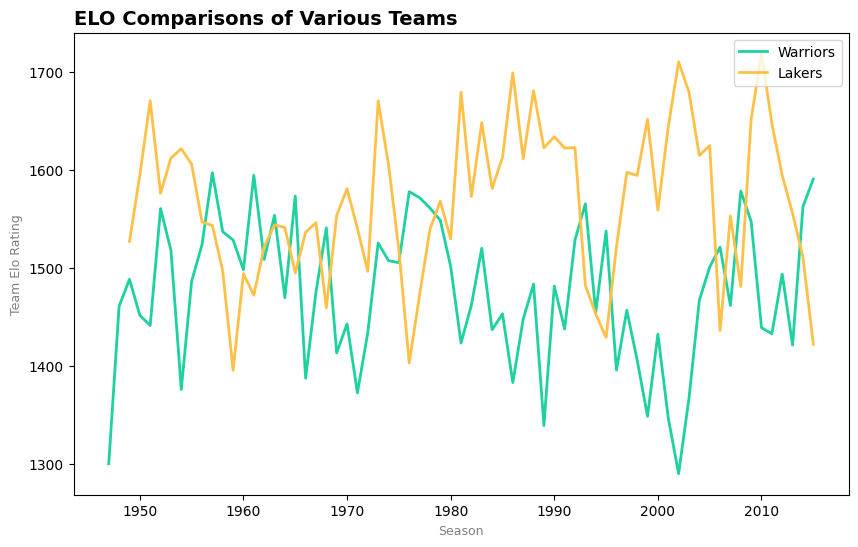

In [8]:
# Let's go ahead and reset our style to default before doing anything else
plt.style.use('default')

# In order to specify new color palettes via rcParams, we'll need to import the cycler module
from cycler import cycler

# There's a few basic things I want to set up, which is the position of our legend, along with our line styles and text styling
# You can see what all is editable in rcParams at the bottom of the Matplotlib guide on customizations (linked at the top)
# You can learn all about Matplotlib legends here: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot/43439132#43439132
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.prop_cycle'] = cycler(color=['#1dd1a1', '#ffc048', '#eb4d4b', '#686de0'])
plt.rcParams['legend.loc'] = 'upper right'
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['axes.labelcolor'] = 'gray'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlelocation'] = 'left'
plt.rcParams['figure.figsize'] = (10, 6)

# Now, any graph in this notebook moving forward is going to be subject to our edited rcParams
basic_graph()

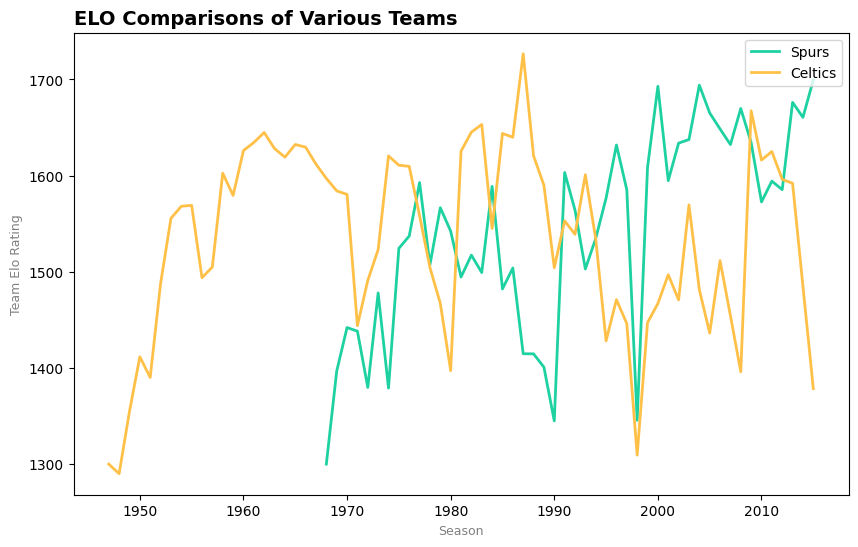

In [9]:
# Let's test it, what if we plotted a comparison of two different teams? Do our adjusted params still hold up? They should...
for i in ['Spurs', 'Celtics']:
    plt.plot(elo_in[elo_in['fran_id'] == i]['year_id'], elo_in[elo_in['fran_id'] == i]['elo_i'], label=i)

plt.xlabel('Season')
plt.ylabel('Team Elo Rating')
plt.title('ELO Comparisons of Various Teams')
plt.legend()
plt.show()

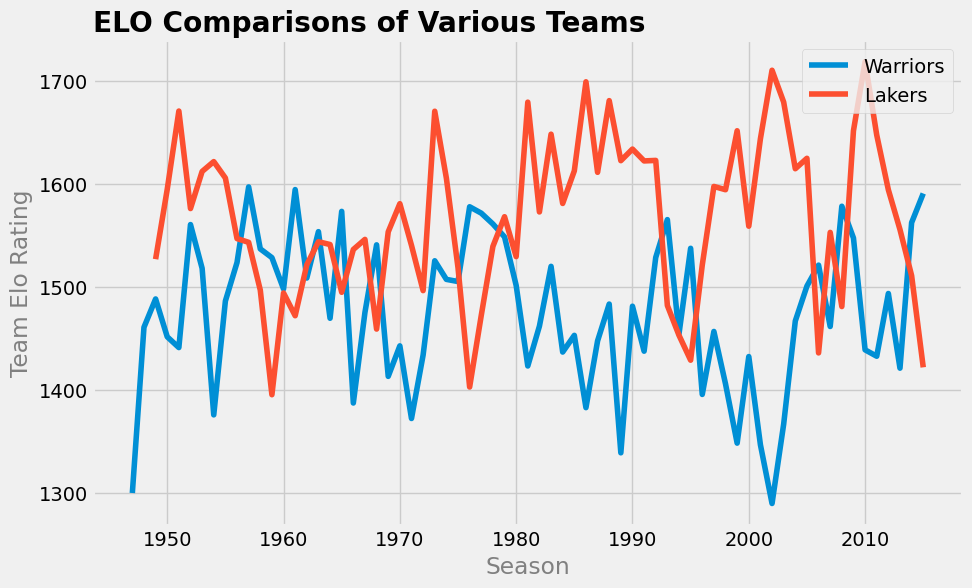

In [10]:
# And in fact, any modification that hasn't explicitly been declared in a style sheet (like legend location or title boldness) will persist as well...
with plt.style.context('fivethirtyeight'):
    basic_graph()

In [11]:
# Let's clean up and reset our style to default before moving any further
plt.style.use('default')

# 3. Creating Our Own Style Sheets

- Great, so we see how we can declare some style changes at the top of a script or notebook and those will flow through.
- Plus, we've already said that it's not the best idea to mess around in the default configuration startup rcParams file.
- So what do we do if we don't want to keep declaring some styles at the top of each script? Is there a place we can save our specs to that won't also overwite the default setup?
- Answer: Yes! We can write our own style sheets and call on them. This file can be written using much of the same methodology from our rcParams script. 
- Just set up a text file with the extension '.mplstyle' and save it with the parameters of your choosing.
- Matplotlib's style sheets are saved in an mpl-data/stylelib folder with the matplotlib source files. If you save your file into here, then you can call on it the same way we called the style sheets above (and you can read the other style sheets as well!). But if you don't want to look for those (or are unable to), no sweat. You can just save it to a locally available folder in your directory, and call on it as you would a regular file.
- I'm gonna save a style sheet example in this DataVizTutorials folder, but I'll also show the contents of the text file below, for reference.

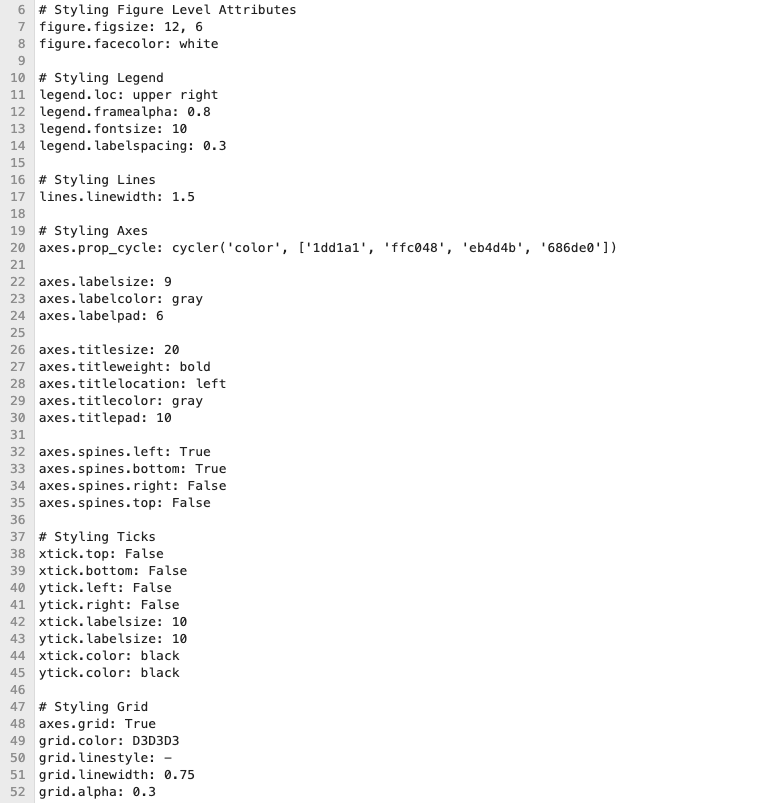

In [15]:
# showing as image since raw text doesn't play well with HTML rendering
from IPython.display import Image
Image(filename='resources/stylesheet.png') 

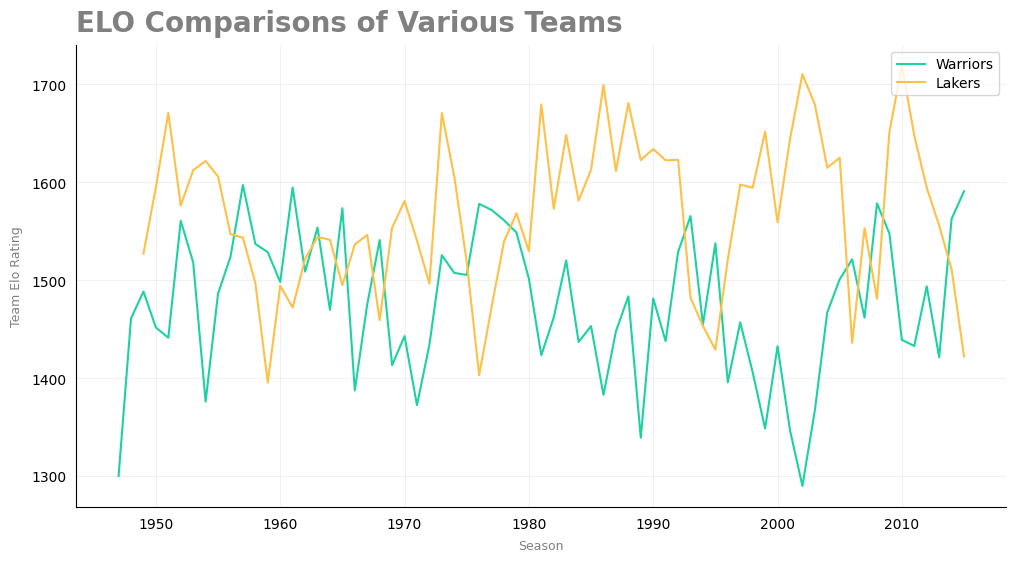

In [12]:
# Now let's apply our new style sheet and see what magic we've wrought!
plt.style.use('tutorial_style.mplstyle')
basic_graph()